<a href="https://colab.research.google.com/github/amartyacodes/ISRO-Internship/blob/main/Caipeex_Analysis_Pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data= pd.read_csv('/content/20090519094654_overview.csv')
data.head()

,Time,Temp (C),RH (%),Barometric Pres. (mBar),Wind Speed (m/s),Wind Direction (deg),Latitude (deg),Longitude (deg),Altitude (m),Roll Angle (deg),Pitch angle (deg),Yaw angle (deg),True Airspeed (m/s),Vertical Wind,Sideslip angle (deg),HW(g/m3),Rosemount_T(C),Analog_HW(V?),CDP_conc[cm-3],CDP_Re[um],CDP_DL[um],CDP_LWC[g/m3],PCASP_conc[cm-3],PCASP_Re[um],PCASP_mass[um/m3],CIP_conc[L-1],CIP_mass[g/m3],DMT_HW[g/m3],CCN_SS_set[%],CCN_SS[%],CCN_conc[cm-3],dT/dt[C/s]
0,35278,39.31,29.4,940.14,0.0,270.0,18.583,73.919,520.0,0.0,0.0,0.0,2.90,0.0,-1.8,-3.689,0.0,0.0,0.000,0.0,2.0,0.0,1724.856,0.252,51.376,NaN,NaN,0.0,0.2,0.102,18881.185,99.000
1,35279,39.40,29.4,940.06,0.0,270.0,18.583,73.919,520.0,0.0,0.0,0.0,2.56,0.0,-1.8,-3.874,0.0,0.0,1.628,0.0,2.0,0.0,1631.219,0.192,15.623,0.0,0.0,0.0,0.2,0.101,15914.557,0.015
2,35280,39.46,29.4,939.96,0.0,270.0,18.583,73.919,520.0,0.0,0.0,0.0,2.16,0.0,-1.8,-4.143,0.0,0.0,0.000,0.0,2.0,0.0,1720.715,0.225,34.763,0.0,0.0,0.0,0.2,0.099,10599.292,0.025
3,35281,39.50,29.4,939.98,0.0,270.0,18.583,73.919,520.0,0.0,0.0,0.0,2.37,0.0,-1.8,-3.991,0.0,0.0,0.000,0.0,2.0,0.0,1712.665,0.195,16.832,0.0,0.0,0.0,0.2,0.102,7420.509,0.030
4,35282,39.51,29.4,939.98,0.0,270.0,18.583,73.919,520.0,0.0,0.0,0.0,1.89,0.0,-1.8,-3.991,0.0,0.0,0.000,0.0,2.0,0.0,1680.370,0.220,30.713,0.0,0.0,0.0,0.2,0.099,6185.057,0.025


In [ ]:
cnt = 0
lst = []
for i in data.columns:
  if data[i].isnull().values.any() == True:
    lst.append(i)
    cnt+=1

lst

['HW(g/m3)', 'CIP_conc[L-1]', 'CIP_mass[g/m3]']

In [ ]:
len(data['CIP_conc[L-1]'].unique())

1356

In [ ]:
len(data['CIP_mass[g/m3]'].unique())

76

In [ ]:
len(data['HW(g/m3)'].unique())

895

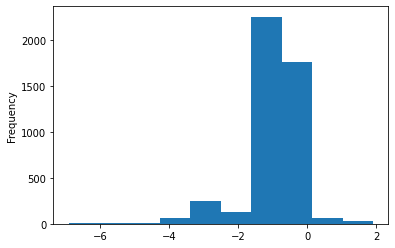

In [ ]:
ax = data['HW(g/m3)'].plot.hist()

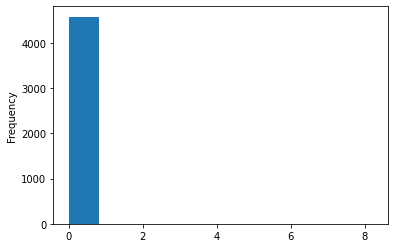

In [ ]:
ax = data['CIP_mass[g/m3]'].plot.hist()

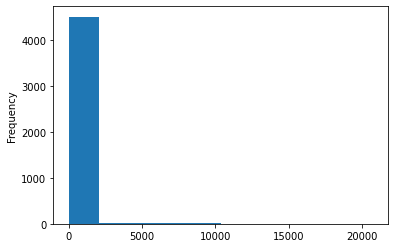

In [ ]:
ax = data['CIP_conc[L-1]'].plot.hist()

In [ ]:
data['CIP_conc[L-1]']= data['CIP_conc[L-1]'].fillna(data['CIP_conc[L-1]'].median())

In [ ]:
data['CIP_mass[g/m3]']= data['CIP_mass[g/m3]'].fillna(data['CIP_mass[g/m3]'].median())

In [ ]:
data['HW(g/m3)']= data['HW(g/m3)'].fillna(data['HW(g/m3)'].mean())

In [ ]:
data.columns

Index(['Time', 'Temp (C)', 'RH (%)', 'Barometric Pres. (mBar)',
       'Wind Speed (m/s)', 'Wind Direction (deg)', 'Latitude (deg)',
       'Longitude (deg)', 'Altitude (m)', 'Roll Angle (deg)',
       'Pitch angle (deg)', 'Yaw angle (deg)', 'True Airspeed (m/s)',
       'Vertical Wind', 'Sideslip angle (deg)', 'HW(g/m3)', 'Rosemount_T(C)',
       'Analog_HW(V?)', 'CDP_conc[cm-3]', 'CDP_Re[um]', 'CDP_DL[um]',
       'CDP_LWC[g/m3]', 'PCASP_conc[cm-3]', 'PCASP_Re[um]',
       'PCASP_mass[um/m3]', 'CIP_conc[L-1]', 'CIP_mass[g/m3]', 'DMT_HW[g/m3]',
       'CCN_SS_set[%]', 'CCN_SS[%]', 'CCN_conc[cm-3]', 'dT/dt[C/s]'],
      dtype='object')

In [ ]:
# data = data.drop(['HW(g/m3)]'], axis=1)

In [ ]:
cnt = 0
lst = []
for i in data.columns:
  if data[i].isnull().values.any() == True:
    lst.append(i)
    cnt+=1

lst

[]

In [ ]:
data.shape

(4627, 32)

In [ ]:
len(data['Time'].unique())

4627

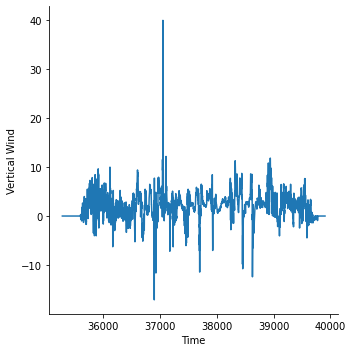

In [ ]:
import seaborn as sns
sns.relplot(
    data=data, kind="line",
    x="Time", y ='Vertical Wind'
    
)

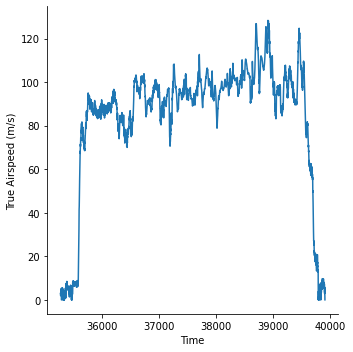

In [ ]:
import seaborn as sns
sns.relplot(
    data=data, kind="line",
    x="Time", y ='True Airspeed (m/s)'
    
)

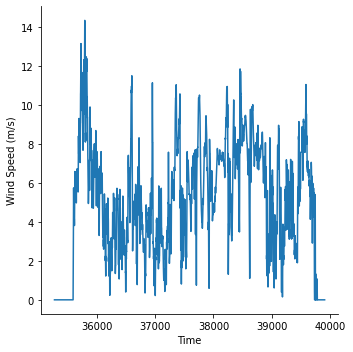

In [ ]:
import seaborn as sns
sns.relplot(
    data=data, kind="line",
    x="Time", y ='Wind Speed (m/s)'
    
)

In [ ]:
!unzip "/content/data (2).zip"

Archive:  /content/data (2).zip
replace polbnda_ind.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: polbnda_ind.dbf         
  inflating: polbnda_ind.prj         
  inflating: polbnda_ind.shp         
  inflating: polbnda_ind.shp.xml     
  inflating: polbnda_ind.shx         
  inflating: polbnda_ind-iso19139.xml  
  inflating: polbnda_ind-iso19110.xml  
  inflating: polbnda_ind-fgdc.xml    


In [ ]:
!pip install geopandas

In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [ ]:
geometry = [Point(xy) for xy in zip(data['Longitude (deg)'], data['Latitude (deg)'])]

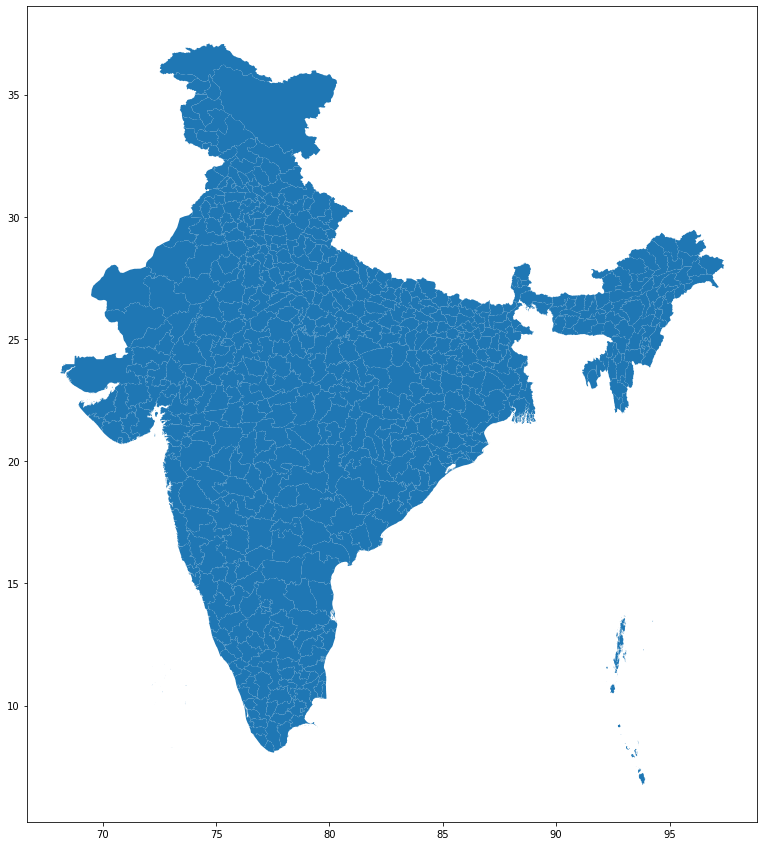

In [ ]:
map = gpd.read_file('/content/polbnda_ind.shp')
fig,ax = plt.subplots(figsize= (15,15))
map.plot(ax=ax)

In [ ]:
crs ={'init' : 'epsg:4326'}


In [ ]:
geo_df = gpd.GeoDataFrame(data,crs=crs,geometry=geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Time,Temp (C),RH (%),Barometric Pres. (mBar),Wind Speed (m/s),Wind Direction (deg),Latitude (deg),Longitude (deg),Altitude (m),Roll Angle (deg),Pitch angle (deg),Yaw angle (deg),True Airspeed (m/s),Vertical Wind,Sideslip angle (deg),HW(g/m3),Rosemount_T(C),Analog_HW(V?),CDP_conc[cm-3],CDP_Re[um],CDP_DL[um],CDP_LWC[g/m3],PCASP_conc[cm-3],PCASP_Re[um],PCASP_mass[um/m3],CIP_conc[L-1],CIP_mass[g/m3],DMT_HW[g/m3],CCN_SS_set[%],CCN_SS[%],CCN_conc[cm-3],dT/dt[C/s],geometry
0,35278,39.31,29.4,940.14,0.0,270.0,18.583,73.919,520.0,0.0,0.0,0.0,2.90,0.0,-1.8,-3.689,0.0,0.0,0.000,0.0,2.0,0.0,1724.856,0.252,51.376,0.0,0.0,0.0,0.2,0.102,18881.185,99.000,POINT (73.91900 18.58300)
1,35279,39.40,29.4,940.06,0.0,270.0,18.583,73.919,520.0,0.0,0.0,0.0,2.56,0.0,-1.8,-3.874,0.0,0.0,1.628,0.0,2.0,0.0,1631.219,0.192,15.623,0.0,0.0,0.0,0.2,0.101,15914.557,0.015,POINT (73.91900 18.58300)
2,35280,39.46,29.4,939.96,0.0,270.0,18.583,73.919,520.0,0.0,0.0,0.0,2.16,0.0,-1.8,-4.143,0.0,0.0,0.000,0.0,2.0,0.0,1720.715,0.225,34.763,0.0,0.0,0.0,0.2,0.099,10599.292,0.025,POINT (73.91900 18.58300)
3,35281,39.50,29.4,939.98,0.0,270.0,18.583,73.919,520.0,0.0,0.0,0.0,2.37,0.0,-1.8,-3.991,0.0,0.0,0.000,0.0,2.0,0.0,1712.665,0.195,16.832,0.0,0.0,0.0,0.2,0.102,7420.509,0.030,POINT (73.91900 18.58300)
4,35282,39.51,29.4,939.98,0.0,270.0,18.583,73.919,520.0,0.0,0.0,0.0,1.89,0.0,-1.8,-3.991,0.0,0.0,0.000,0.0,2.0,0.0,1680.370,0.220,30.713,0.0,0.0,0.0,0.2,0.099,6185.057,0.025,POINT (73.91900 18.58300)


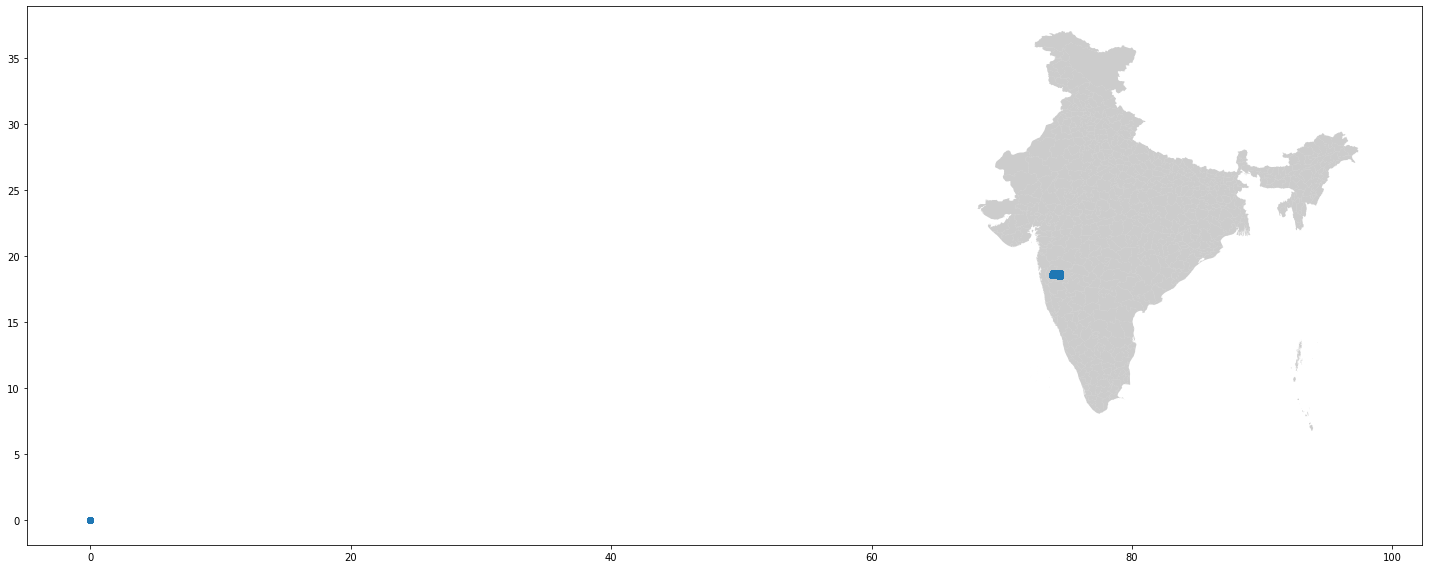

In [ ]:
fig,ax =plt.subplots(figsize=(25,25))
map.plot(ax=ax,alpha = 0.4,color='grey')
geo_df.plot(ax=ax)

In [ ]:
data.columns

Index(['Time', 'Temp (C)', 'RH (%)', 'Barometric Pres. (mBar)',
       'Wind Speed (m/s)', 'Wind Direction (deg)', 'Latitude (deg)',
       'Longitude (deg)', 'Altitude (m)', 'Roll Angle (deg)',
       'Pitch angle (deg)', 'Yaw angle (deg)', 'True Airspeed (m/s)',
       'Vertical Wind', 'Sideslip angle (deg)', 'HW(g/m3)', 'Rosemount_T(C)',
       'Analog_HW(V?)', 'CDP_conc[cm-3]', 'CDP_Re[um]', 'CDP_DL[um]',
       'CDP_LWC[g/m3]', 'PCASP_conc[cm-3]', 'PCASP_Re[um]',
       'PCASP_mass[um/m3]', 'CIP_conc[L-1]', 'CIP_mass[g/m3]', 'DMT_HW[g/m3]',
       'CCN_SS_set[%]', 'CCN_SS[%]', 'CCN_conc[cm-3]', 'dT/dt[C/s]',
       'geometry'],
      dtype='object')

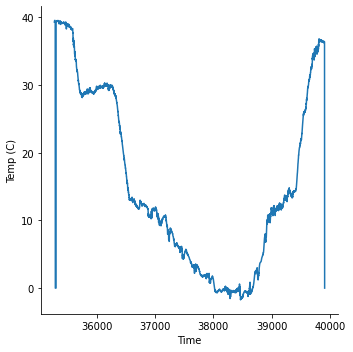

In [ ]:
import seaborn as sns
sns.relplot(
    data=data, kind="line",
    x="Time", y ='Temp (C)'
    
)

In [ ]:
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
from scipy.cluster.hierarchy import cut_tree


In [ ]:
data

,Time,Temp (C),RH (%),Barometric Pres. (mBar),Wind Speed (m/s),Wind Direction (deg),Latitude (deg),Longitude (deg),Altitude (m),Roll Angle (deg),Pitch angle (deg),Yaw angle (deg),True Airspeed (m/s),Vertical Wind,Sideslip angle (deg),HW(g/m3),Rosemount_T(C),Analog_HW(V?),CDP_conc[cm-3],CDP_Re[um],CDP_DL[um],CDP_LWC[g/m3],PCASP_conc[cm-3],PCASP_Re[um],PCASP_mass[um/m3],CIP_conc[L-1],CIP_mass[g/m3],DMT_HW[g/m3],CCN_SS_set[%],CCN_SS[%],CCN_conc[cm-3],dT/dt[C/s],geometry
0,35278,39.31,29.4,940.14,0.0,270.0,18.583,73.919,520.0,0.00,0.00,0.00,2.90,0.0,-1.8,-3.689,0.0,0.0,0.000,0.0,2.0,0.0,1724.856,0.252,51.376,0.0,0.0,0.0,0.2,0.102,18881.185,99.000,POINT (73.91900 18.58300)
1,35279,39.40,29.4,940.06,0.0,270.0,18.583,73.919,520.0,0.00,0.00,0.00,2.56,0.0,-1.8,-3.874,0.0,0.0,1.628,0.0,2.0,0.0,1631.219,0.192,15.623,0.0,0.0,0.0,0.2,0.101,15914.557,0.015,POINT (73.91900 18.58300)
2,35280,39.46,29.4,939.96,0.0,270.0,18.583,73.919,520.0,0.00,0.00,0.00,2.16,0.0,-1.8,-4.143,0.0,0.0,0.000,0.0,2.0,0.0,1720.715,0.225,34.763,0.0,0.0,0.0,0.2,0.099,10599.292,0.025,POINT (73.91900 18.58300)
3,35281,39.50,29.4,939.98,0.0,270.0,18.583,73.919,520.0,0.00,0.00,0.00,2.37,0.0,-1.8,-3.991,0.0,0.0,0.000,0.0,2.0,0.0,1712.665,0.195,16.832,0.0,0.0,0.0,0.2,0.102,7420.509,0.030,POINT (73.91900 18.58300)
4,35282,39.51,29.4,939.98,0.0,270.0,18.583,73.919,520.0,0.00,0.00,0.00,1.89,0.0,-1.8,-3.991,0.0,0.0,0.000,0.0,2.0,0.0,1680.370,0.220,30.713,0.0,0.0,0.0,0.2,0.099,6185.057,0.025,POINT (73.91900 18.58300)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,39900,36.42,37.2,939.90,0.0,270.0,18.582,73.911,501.0,-2.01,-0.08,244.36,3.61,0.0,-1.8,-3.480,0.0,0.0,0.000,0.0,2.0,0.0,2086.700,0.222,37.691,0.0,0.0,0.0,0.2,0.237,9432.213,0.090,POINT (73.91100 18.58200)
4623,39901,36.36,37.2,939.74,0.0,270.0,18.582,73.911,501.0,-2.01,-0.08,244.34,4.89,0.0,-1.8,-3.084,0.0,0.0,0.000,0.0,2.0,0.0,1970.907,0.232,43.092,0.0,0.0,0.0,0.2,0.229,9645.411,0.090,POINT (73.91100 18.58200)
4624,39902,36.36,37.2,939.62,0.0,270.0,18.582,73.911,501.0,-2.02,-0.14,244.36,3.23,0.0,-1.8,-3.640,0.0,0.0,0.000,0.0,2.0,0.0,1999.811,0.248,56.559,0.0,0.0,0.0,0.2,0.223,9802.417,0.075,POINT (73.91100 18.58200)
4625,39903,0.00,0.0,0.00,0.0,0.0,0.000,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,1910.985,0.188,14.248,0.0,0.0,0.0,0.2,0.217,9628.491,0.095,POINT (0.00000 0.00000)


In [ ]:
data= data.drop(['geometry'],axis=1)

In [ ]:
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(data)
df_scaled.shape

(4627, 32)

In [ ]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [ ]:
x =df_scaled

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]


In [ ]:


for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.22909257458820007
For n_clusters=3, the silhouette score is 0.25353347612615634
For n_clusters=4, the silhouette score is 0.22116066480892266
For n_clusters=5, the silhouette score is 0.21648176300411773
For n_clusters=6, the silhouette score is 0.22303877810774717
For n_clusters=7, the silhouette score is 0.2387177792698155
For n_clusters=8, the silhouette score is 0.20361697963550954


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


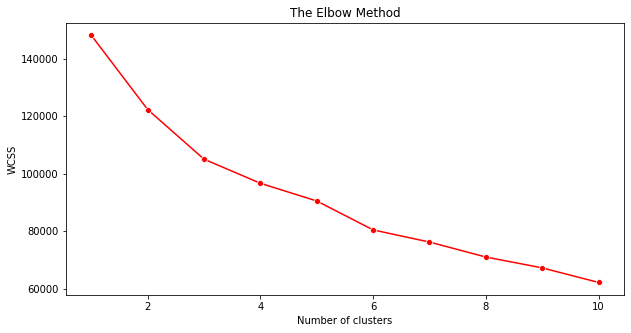

In [ ]:

import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_kmeans=kmeans.fit_predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


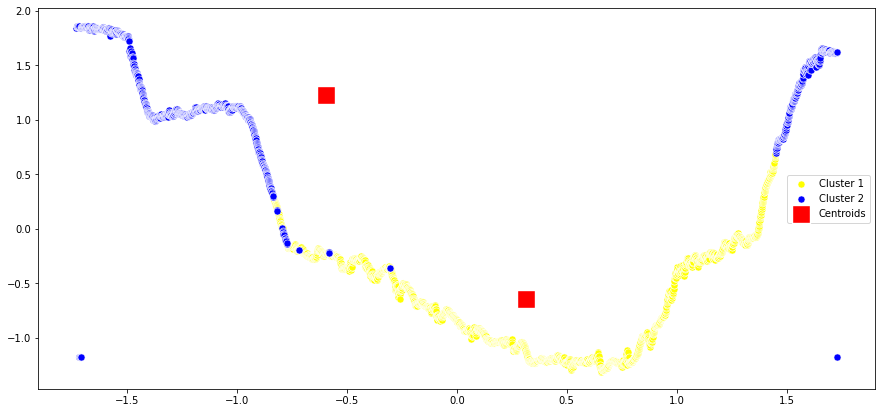

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
# sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
# sns.scatterplot(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
# sns.scatterplot(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)

# sns.scatterplot(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], color = 'red', label = 'Cluster 6',s=50)
# sns.scatterplot(x[y_kmeans == 6, 0], x[y_kmeans == 6, 1], color = 'violet', label = 'Cluster 7',s=50)
# sns.scatterplot(x[y_kmeans == 7, 0], x[y_kmeans == 7, 1], color = 'indigo', label = 'Cluster 8',s=50)
# sns.scatterplot(x[y_kmeans == 8, 0], x[y_kmeans == 8, 1], color = 'violet', label = 'Cluster 9',s=50)
# sns.scatterplot(x[y_kmeans == 9, 0], x[y_kmeans == 9, 1], color = 'orange', label = 'Cluster 10',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.legend()
plt.show()